In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
sgd = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, decay=1e-6)
adam = Adam(learning_rate=0.001)
rmsprop = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001, decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])

model_sgd = model
history_sgd = model_sgd.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

model_adam = model
history_adam = model_adam.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

model_rmsprop = model
history_rmsprop = model_rmsprop.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))


score_sgd = model_sgd.evaluate(x_test, y_test, verbose=0)
score_adam = model_adam.evaluate(x_test, y_test, verbose=0)
score_rmsprop = model_rmsprop.evaluate(x_test, y_test, verbose=0)

print("SGD Test Loss:", score_sgd[0])
print('SGD Test accuracy:', score_sgd[1])

print("Adam Test Loss:", score_adam[0])
print('Adam Test accuracy:', score_adam[1])

print("RMSprop Test Loss:", score_rmsprop[0])
print('RMSprop Test accuracy:', score_rmsprop[1])




Epoch 1/5
  6/469 [..............................] - ETA: 5s - loss: 0.0575 - accuracy: 0.9857  

2023-03-25 07:08:35.422122: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 5s 10ms/step - loss: 0.0324 - accuracy: 0.9921 - val_loss: 0.0242 - val_accuracy: 0.9938
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0347 - accuracy: 0.9918 - val_loss: 0.0222 - val_accuracy: 0.9932
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0334 - accuracy: 0.9915 - val_loss: 0.0242 - val_accuracy: 0.9934
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0342 - accuracy: 0.9911 - val_loss: 0.0303 - val_accuracy: 0.9923
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0353 - accuracy: 0.9910 - val_loss: 0.0234 - val_accuracy: 0.9938
Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0361 - accuracy: 0.9908 - val_loss: 0.0186 - val_accuracy: 0.9939
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0359 - accuracy: 0.9912 - val_loss: 0.0362 - val_accuracy: 0.9934
Epoch 3/5
469/469

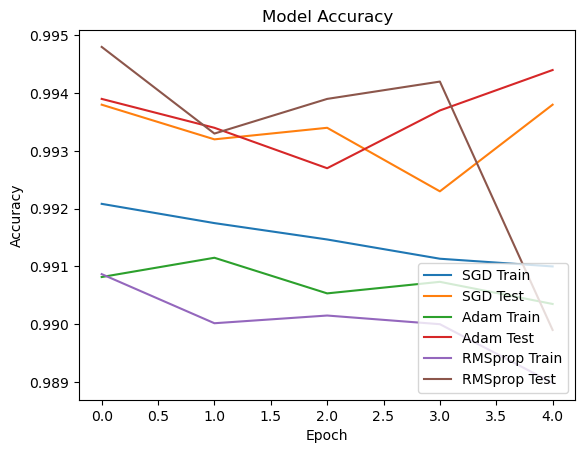

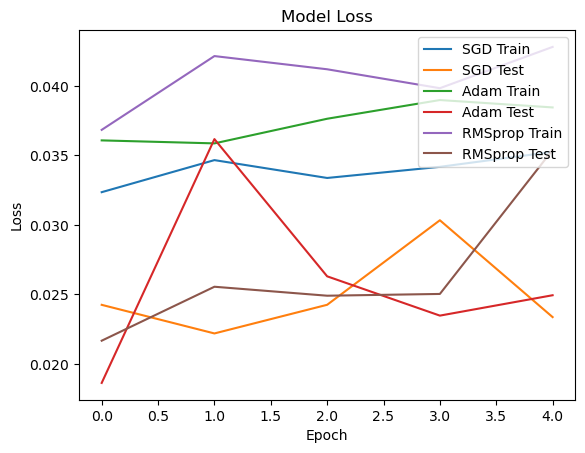

In [11]:
import matplotlib.pyplot as plt


plt.plot(history_sgd.history['accuracy'])
plt.plot(history_sgd.history['val_accuracy'])

plt.plot(history_adam.history['accuracy'])
plt.plot(history_adam.history['val_accuracy'])

plt.plot(history_rmsprop.history['accuracy'])
plt.plot(history_rmsprop.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['SGD Train', 'SGD Test', 'Adam Train', 'Adam Test', 'RMSprop Train', 'RMSprop Test'], loc='lower right')
plt.show()


plt.plot(history_sgd.history['loss'])
plt.plot(history_sgd.history['val_loss'])

plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])

plt.plot(history_rmsprop.history['loss'])
plt.plot(history_rmsprop.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['SGD Train', 'SGD Test', 'Adam Train', 'Adam Test', 'RMSprop Train', 'RMSprop Test'], loc='upper right')
plt.show()